# 0. 기본 정보
- 코드 작성자: 여서연
- 코드 작성일: 2024-09-16 
- 데이터 분석 목적: 데이터 상태 파악
- 데이터 출처: [The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=movies_metadata.csv)

## 라이브러리 및 기초 설정

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [2]:
# 열 중간 잘리지 않게 설정

pd.set_option('display.max_columns', None)

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 데이터 세부 정보 확인

컬럼 설명
---
- adult(bool): 성인 영화 여부
- belongs_to_collection(json): 컬렉션 정보
- budget(int): 제작 예산
- genres(json): 장르 정보
- homepage(str): 공식 홈페이지 주소
<br></br>
- id(int): id
- imdb_id(str): IMDB 사용 id
- original_language(str): 원어 코드
- original_title(str): 원제
- overview(str): 줄거리 또는 요약 정보
<br></br>
- popularity(float): 인기도 점수
- poster_path(str): 포스터 이미지 경로
- production_companies(json): 제작사
- production_countries(json): 제작 국가
- release_date(YY-MM-DD): 개봉일
<br></br>
- revenue(int): 총 수익
- runtime(int): 상영 시간(분)
- spoken_languages(json): 사용 언어
- status(str): 상태
- tagline(str): 태그라인 (짧은 홍보 문구)
<br></br>
- title(str): 제목
- video(bool): 관련 클립 존재 여부
- vote_average(float): 사용자 평점 평균
- vote_count(int): 사용자 평점 수

In [4]:
mvmd_origin = pd.read_csv('../data/movies_metadata.csv')

In [5]:
mvmd_origin.shape

(45466, 24)

In [6]:
mvmd_origin.sample(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
18187,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,94509,tt1079450,pt,El silencio antes de Bach (Die Stille vor Bach),This latest feature from the eccentrically exp...,0.153329,/tBkCbvTwC7wTEuDkemj8SncxOdS.jpg,"[{'name': '59 Films', 'id': 22109}]","[{'iso_3166_1': 'ES', 'name': 'Spain'}, {'iso_...",2007-12-21,0.0,102.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,NaN,The Silence Before Bach,False,8.3,3.0
18075,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,95448,tt1781843,fr,L'Exercice de l'État,Transport Minister Bertrand Saint-Jean is awok...,2.136651,/eJs69hnh5EPhxljyxQ0E1H7FCAl.jpg,"[{'name': 'Archipel 35', 'id': 2695}]","[{'iso_3166_1': 'FR', 'name': 'France'}]",2011-10-26,0.0,115.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,The Minister,False,5.7,32.0
1158,False,"{'id': 8091, 'name': 'Alien Collection', 'post...",18500000,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",NaN,679,tt0090605,en,Aliens,When Ripley's lifepod is found by a salvage cr...,21.761179,/nORMXEkYEbzkU5WkMWMgRDJwjSZ.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1986-07-18,183316455.0,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,This Time It's War,Aliens,False,7.7,3282.0
6269,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,29586,tt0059358,en,King Rat,When Singapore surrendered to the Japanese in ...,2.383562,/wxdXpT3NAPfMkbznC26fGlZw7m7.jpg,"[{'name': 'Coleytown', 'id': 4970}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1965-10-27,0.0,134.0,"[{'iso_639_1': 'ja', 'name': '日本語'}, {'iso_639...",Released,They made the toughest among them... King!,King Rat,False,6.7,22.0
19243,False,NaN,0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",NaN,18095,tt0142232,ja,悟空外伝! 勇気の証しは四星球,Son Goku Jr. is the grand-grandson of the lege...,3.643117,/fIO80OtOOMkTBQNm02GfvR7aNGb.jpg,"[{'name': 'Toei Animation', 'id': 5542}]","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",1997-03-26,0.0,45.0,"[{'iso_639_1': 'ca', 'name': 'Català'}, {'iso_...",Released,NaN,Dragon Ball GT: A Hero's Legacy,False,6.2,55.0
8033,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,52741,tt0100613,en,Side Out,A law student comes to California for the summ...,0.131923,/kYRAqKU3eNsKsRhx4UZ18ONEGXd.jpg,"[{'name': 'TriStar Pictures', 'id': 559}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1990-03-30,0.0,104.0,[],Released,NaN,Side Out,False,4.0,10.0
26462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10769, 'n...",NaN,85429,tt0217136,en,Voyous voyelles,Three very different adolescent girls team up ...,0.220359,/a6jQeS1itKpFt92UJTrK4LVKawo.jpg,[],"[{'iso_3166_1': 'FR', 'name': 'France'}]",2000-02-09,0.0,95.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,NaN,Pretty Devils,False,4.3,4.0
37741,False,NaN,0,"[{'id': 27, 'name': 'Horror'}]",NaN,48613,tt0171512,it,La maschera del demonio,A group of five or six or seven friends go ski...,0.219358,/1TUknJMvge7OCjsDtDTzahJY2HO.jpg,"[{'name': 'Beta Film', 'id': 1080}, {'name': '...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1989-01-02,0.0,94.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",Released,NaN,The Devil's Veil,False,4.0,2.0
8609,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,45706,tt0061101,ja,東京流れ者,After yakuza boss Kurata dissolves his own cri...,2.357111,/dkscSldTB6FGUMMLnInUfKYLfPR.jpg,"[{'name': 'Nikkatsu', 'id': 955}]","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",1966-04-10,0.0,83.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Tokyo Drifter,False,7.4,46.0
22796,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",http://www.theasylum.cc/product.php?id=232,232731,tt3184096

In [7]:
mvmd_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [8]:
# 변수 타입
data_types = mvmd_origin.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'video']

양적 변수: ['revenue', 'runtime', 'vote_average', 'vote_count']


In [9]:
# 숫자로 변환할 수 없는 값 확인
for col in ['budget','id','popularity']:
    invalid_values = mvmd_origin[pd.to_numeric(mvmd_origin[col], errors='coerce').isna()]
    print(f'[{col}]\n{invalid_values[col]}\n')

[budget]
19730    /ff9qCepilowshEtG2GYWwzt2bs4.jpg
29503    /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg
35587    /zaSf5OG7V8X8gqFvly88zDdRm46.jpg
Name: budget, dtype: object

[id]
19730    1997-08-20
29503    2012-09-29
35587    2014-01-01
Name: id, dtype: object

[popularity]
19729                      NaN
19730                      NaN
29502                      NaN
29503                      NaN
35586                      NaN
35587    Beware Of Frost Bites
Name: popularity, dtype: object



In [10]:
mvmd_origin.iloc[[19730,29503,35587]]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**논의 사항 1**
---
- `budget`, `id`: 문제의 행 삭제
- `popularity`: 결측치 보간

In [11]:
mvmd = mvmd_origin.drop([19730, 29503, 35587])
mvmd = mvmd.reset_index(drop=True)
mvmd.iloc[19729:19732]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,False,NaN,21000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://silverliningsplaybookmovie.com/,82693,tt1045658,en,Silver Linings Playbook,After spending eight months in a mental instit...,14.488111,/ilrZAV2klTB0FLxLb01bOp5pzD9.jpg,"[{'name': 'The Weinstein Company', 'id': 308}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-08,205738714.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Watch For The Signs,Silver Linings Playbook,False,7.0,4840.0
19731,False,NaN,31000000,"[{'id': 18, 'name': 'Drama'}]",http://www.paramount.com/flight,87502,tt1907668,en,Flight,Commercial airline pilot Whip Whitaker has a p...,10.973822,/8XEbkjgorAm9xk15mF63jqJ4ByV.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-11-02,161772375.0,138.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Flight,False,6.5,2449.0


In [12]:
mvmd.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


# 1. 결측치

In [13]:
mvmd.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   3
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25051
title                        3
video                        3
vote_average                 3
vote_count                   3
dtype: int64

**논의 사항 2**
---
- `belongs_to_collection`, `homepage`, `overview`, `poster_path`, `tagline`: 수도 많고 고유한 값이라 보간도 어려우므로 컬럼 삭제
- `imdb_id`, `original_language`, `runtime`, `status`: 최빈값?
- 그외: 3개씩 있는 걸 봐선 마음 편하게 해당 행 삭제?

In [14]:
# 결측치가 3개인 컬럼 찾기
missing_3_cols = mvmd.isnull().sum()[mvmd.isnull().sum() == 3].index

# 각 컬럼에서 결측치의 위치(인덱스) 출력
for col in missing_3_cols:
    missing_indices = mvmd[mvmd[col].isnull()].index
    print(f"Column: {col}")
    print(f"Missing at indices: {list(missing_indices)}\n")

Column: popularity
Missing at indices: [19729, 29501, 35584]

Column: production_companies
Missing at indices: [19729, 29501, 35584]

Column: production_countries
Missing at indices: [19729, 29501, 35584]

Column: revenue
Missing at indices: [19729, 29501, 35584]

Column: spoken_languages
Missing at indices: [19729, 29501, 35584]

Column: title
Missing at indices: [19729, 29501, 35584]

Column: video
Missing at indices: [19729, 29501, 35584]

Column: vote_average
Missing at indices: [19729, 29501, 35584]

Column: vote_count
Missing at indices: [19729, 29501, 35584]



In [15]:
mvmd.iloc[[19729,29501,35584]]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29501,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35584,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
mvmd_cleaned = mvmd.drop([19729,29501,35584])
mvmd_cleaned = mvmd_cleaned.reset_index(drop=True)
mvmd_cleaned.iloc[19728:19731]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19728,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,27058,tt0171227,en,Diplomatic Siege,When Steve Mitchell is clandestinely sent to t...,0.571035,/tLsQcikwkWKQiD7IHO0WIVe7m0Y.jpg,[],[],1999-11-17,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Diplomatic Siege,False,4.7,3.0
19729,False,NaN,21000000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://silverliningsplaybookmovie.com/,82693,tt1045658,en,Silver Linings Playbook,After spending eight months in a mental instit...,14.488111,/ilrZAV2klTB0FLxLb01bOp5pzD9.jpg,"[{'name': 'The Weinstein Company', 'id': 308}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-08,205738714.0,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Watch For The Signs,Silver Linings Playbook,False,7.0,4840.0
19730,False,NaN,31000000,"[{'id': 18, 'name': 'Drama'}]",http://www.paramount.com/flight,87502,tt1907668,en,Flight,Commercial airline pilot Whip Whitaker has a p...,10.973822,/8XEbkjgorAm9xk15mF63jqJ4ByV.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-11-02,161772375.0,138.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Flight,False,6.5,2449.0


# 2. 피처 선택

In [17]:
mvmd_selected = mvmd_cleaned.drop(columns=['belongs_to_collection','homepage','overview','poster_path','tagline'])
mvmd_selected.sample(10)

,adult,budget,genres,id,imdb_id,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
23017,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",118915,tt0067801,en,Such Good Friends,0.607919,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1971-12-16,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Such Good Friends,False,4.8,4.0
175,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",15730,tt0107447,en,Love & Human Remains,0.354014,[{'name': 'The Ontario Film Development Corpor...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}]",1993-05-20,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Love & Human Remains,False,7.0,7.0
31657,False,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",102038,tt0050204,en,Bombers B-52,0.943944,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1957-11-22,0.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Bombers B-52,False,5.3,3.0
36633,False,0,"[{'id': 18, 'name': 'Drama'}]",129820,tt0061536,hu,Csend és kiáltás,0.476432,"[{'name': 'Mafilm', 'id': 8100}]","[{'iso_3166_1': 'HU', 'name': 'Hungary'}]",1968-06-12,0.0,73.0,"[{'iso_639_1': 'hu', 'name': 'Magyar'}]",Released,Silence and Cry,False,6.8,5.0
43216,False,0,"[{'id': 18, 'name': 'Drama'}]",436340,tt5980798,fr,Félicité,0.318809,"[{'name': 'Granit Films', 'id': 16882}, {'name...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2017-03-29,0.0,123.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,Félicité,False,6.0,3.0
17016,False,0,[],141241,tt0461892,ro,15,0.03856,"[{'name': 'Media Pro Pictures', 'id': 3244}, {...","[{'iso_3166_1': 'RO', 'name': 'Romania'}]",2005-10-21,28.0,95.0,"[{'iso_639_1': 'ro', 'name': 'Română'}]",Released,15,False,8.0,1.0
19328,False,5000000,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",14128,tt0291082,en,Cinderella II: Dreams Come True,8.002712,"[{'name': 'Walt Disney Television Animation', ...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2002-02-23,0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Cinderella II: Dreams Come True,False,5.5,265.0
17616,False,0,"[{'id': 10751, 'name': 'Family'}, {'id': 18, '...",59435,tt1212454,en,An Invisible Sign,2.23481,"[{'name': 'Silverwood Films', 'id': 2293}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-10-06,1279.0,96.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,An Invisible Sign,False,5.3,39.0
31738,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",65696,tt1808360,pl,"Och, Karol 2",0.325635,[],"[{'iso_3166_1': 'PL', 'name': 'Poland'}]",2011-01-21,0.0,97.0,"[{'iso_639_1': 'pl', 'name': 'Polski'}]",Released,"Och, Karol 2",False,4.8,9.0
28263,False,0,"[{'id': 53, 'name': 'Thriller'}]",15468,tt0082342,fr,"Espion, lève-toi",1.952949,"[{'name': 'TF1 Films Production', 'id': 3823},...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1982-01-27,0.0,98.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,"Spy, Stand Up",False,6.1,6.0


## 분포 확인

In [18]:
# 숫자로 변환할 수 없는 값 확인
for col in ['budget','id','popularity']:
    invalid_values = mvmd_selected[pd.to_numeric(mvmd_selected[col], errors='coerce').isna()]
    print(f'[{col}]\n{invalid_values[col]}\n')

[budget]
Series([], Name: budget, dtype: object)

[id]
Series([], Name: id, dtype: object)

[popularity]
Series([], Name: popularity, dtype: object)



In [19]:
# 숫자형으로 변환
mvmd_selected['budget'] = pd.to_numeric(mvmd_selected['budget']).astype('int64')
mvmd_selected['id'] = pd.to_numeric(mvmd_selected['id']).astype('int64')
mvmd_selected['popularity'] = pd.to_numeric(mvmd_selected['popularity']).astype('int64')

In [20]:
mvmd_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45460 entries, 0 to 45459
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45460 non-null  object 
 1   budget                45460 non-null  int64  
 2   genres                45460 non-null  object 
 3   id                    45460 non-null  int64  
 4   imdb_id               45443 non-null  object 
 5   original_language     45449 non-null  object 
 6   original_title        45460 non-null  object 
 7   popularity            45460 non-null  int64  
 8   production_companies  45460 non-null  object 
 9   production_countries  45460 non-null  object 
 10  release_date          45376 non-null  object 
 11  revenue               45460 non-null  float64
 12  runtime               45203 non-null  float64
 13  spoken_languages      45460 non-null  object 
 14  status                45379 non-null  object 
 15  title              

In [21]:
# 변수 타입
data_types = mvmd_selected.dtypes
qual_vari = data_types[data_types == 'object'].index.tolist()
quant_vari = data_types[data_types != 'object'].index.tolist()

print("질적 변수:", qual_vari)
print()
print("양적 변수:", quant_vari)

질적 변수: ['adult', 'genres', 'imdb_id', 'original_language', 'original_title', 'production_companies', 'production_countries', 'release_date', 'spoken_languages', 'status', 'title', 'video']

양적 변수: ['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count']


In [22]:
# string
for col in ['adult','original_language','status','video']:
    print(f'{mvmd_selected[col].value_counts()}\n')

adult
False    45451
True         9
Name: count, dtype: int64

original_language
en    32267
fr     2438
it     1529
ja     1349
de     1080
      ...  
ay        1
rw        1
cy        1
tg        1
si        1
Name: count, Length: 89, dtype: int64

status
Released           45014
Rumored              230
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: count, dtype: int64

video
False    45367
True        93
Name: count, dtype: int64



In [23]:
target_cols = quant_vari
box_lists = len(target_cols)
box_rows = int(box_lists ** 0.5)  #제곱근을 정수로 변환하여 가장 가까운 값으로 설정
box_cols = (box_lists + box_rows - 1) // box_rows  #가장 가까운 값을 사용하여 열 개수 계산

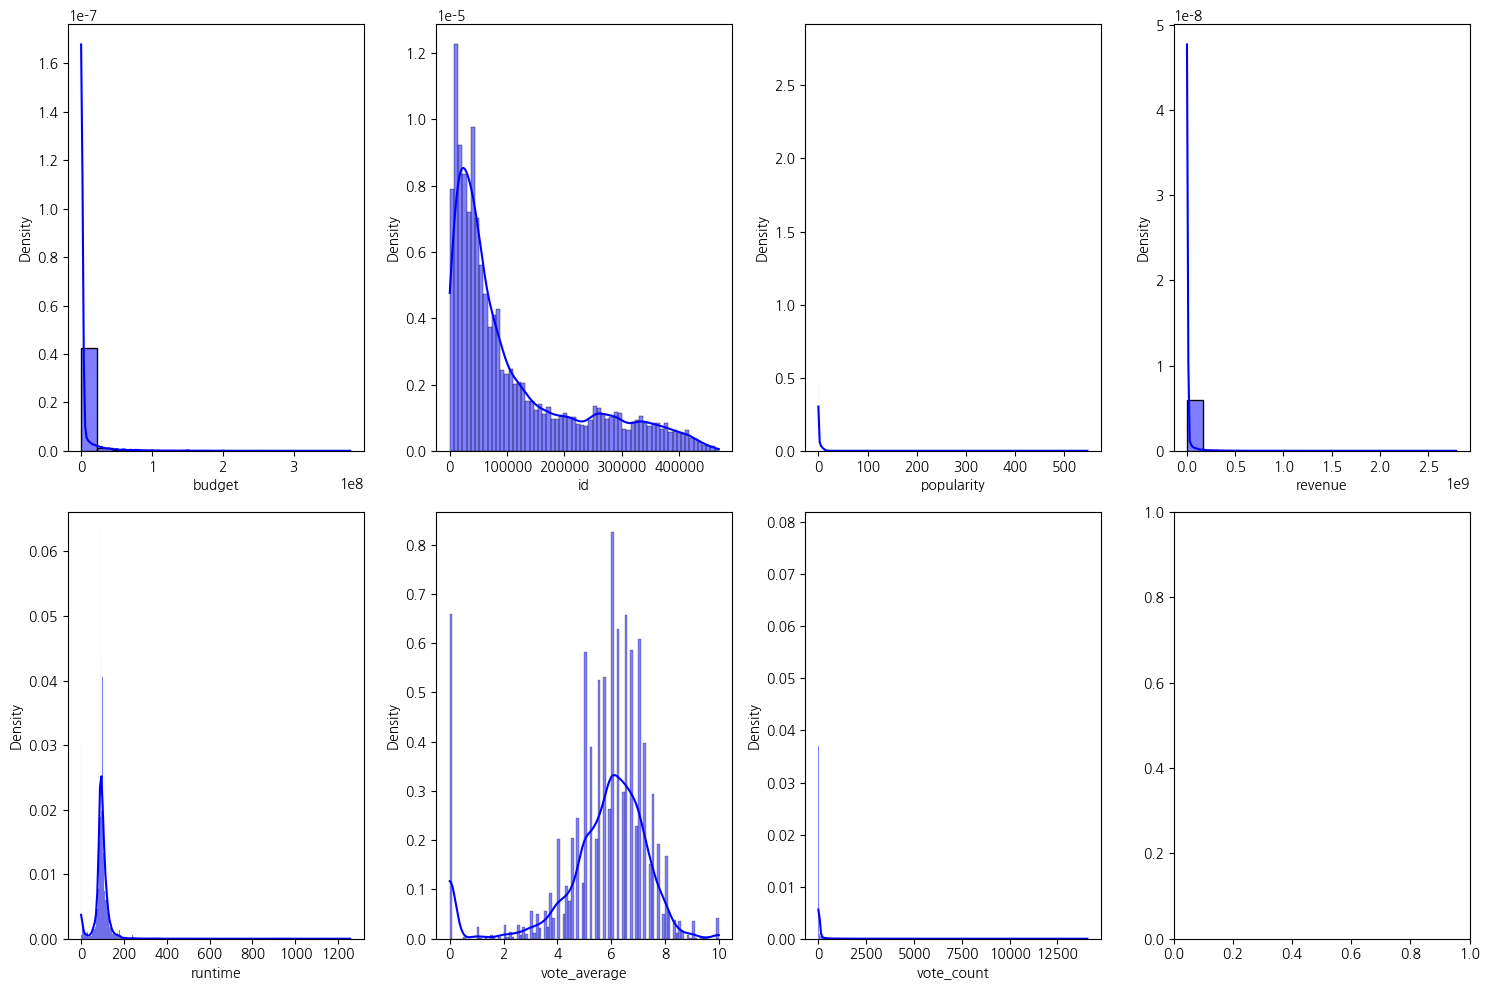

In [24]:
fig, axes = plt.subplots(box_rows, box_cols, figsize=(15, 10))

for i, col in enumerate(target_cols):
    row_idx = i // box_cols
    col_idx = i % box_cols

    ax = axes[row_idx, col_idx] if box_rows > 1 else axes[col_idx]
    sns.histplot(mvmd_selected[col], color='blue', kde=True, ax=ax, label='Negative', stat='density', alpha=0.5)
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

**논의 사항 3**
---
- `id`를 제외하고는 0인 값을 결측치로 간주 -> 보간 방법 결정

# 3. 이상치

In [25]:
mvmd_selected.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45460.00000,45460.000000,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,4.224858e+06,108357.07004,2.495491,1.120935e+07,94.128199,5.618207,109.897338
std,1.742467e+07,112462.43383,5.976228,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,2.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,26448.50000,0.000000,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,59999.00000,1.000000,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,157324.00000,3.000000,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,469172.00000,547.000000,2.787965e+09,1256.000000,10.000000,14075.000000


In [26]:
'''
sns.displot(mvmd_selected['budget'], kde=True)
plt.show()
'''

"\nsns.displot(mvmd_selected['budget'], kde=True)\nplt.show()\n"

In [27]:
'''
sns.displot(mvmd_selected['popularity'], kde=True)
plt.show()
'''

"\nsns.displot(mvmd_selected['popularity'], kde=True)\nplt.show()\n"

In [28]:
'''
sns.displot(mvmd_selected['revenue'], kde=True)
plt.show()
'''

"\nsns.displot(mvmd_selected['revenue'], kde=True)\nplt.show()\n"

In [29]:
'''
sns.displot(mvmd_selected['runtime'], kde=True)
plt.show()
'''

"\nsns.displot(mvmd_selected['runtime'], kde=True)\nplt.show()\n"

In [30]:
'''
sns.displot(mvmd_selected['vote_average'], kde=True)
plt.show()
'''

"\nsns.displot(mvmd_selected['vote_average'], kde=True)\nplt.show()\n"

In [31]:
'''
sns.displot(mvmd_selected['vote_count'], kde=True)
plt.show()
'''

"\nsns.displot(mvmd_selected['vote_count'], kde=True)\nplt.show()\n"